#  EDA - Mental Health & Lifestyle Habits Dataset

## Objective

Perform a comprehensive exploratory data analysis of the Mental Health & Lifestyle Habits dataset to:
- Understand lifestyle factors and their relationship with mental health
- Analyze work-life balance indicators (Work Hours, Screen Time)
- Identify patterns between lifestyle habits and happiness/stress levels
- Detect missing values and outliers
- Prepare the dataset for feature engineering and merging with other datasets

## Dataset

**File:** `03_mental_health_lifestyle.csv`  
**Source:** Mental Health & Lifestyle Habits Dataset  
**Key Variables:** Work Hours, Screen Time, Sleep Hours, Stress Level, Happiness Score, Mental Health Condition

## 1. Imports and settings

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
from scipy.stats import f_oneway

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Path configuration
BASE_DIR = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
RAW_DATA_DIR = BASE_DIR / 'datasets' / 'raw'
PROCESSED_DATA_DIR = BASE_DIR / 'datasets' / 'processed'

# Create processed directory if it doesn't exist
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)


## 2. Data loading

Load the dataset and perform an initial inspection of its structure

In [2]:
df = pd.read_csv(RAW_DATA_DIR / '03_mental_health_lifestyle.csv')
df

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Japan,57,Female,Moderate,Balanced,7.0,High,Depression,29,4.4,9.7,5.9
2996,Australia,27,Male,Low,Junk Food,7.1,Low,NaN,47,7.4,6.3,9.9
2997,Australia,42,Male,Moderate,Balanced,6.0,High,Depression,23,3.9,5.2,4.1
2998,Australia,25,Male,High,Keto,5.7,Low,Anxiety,51,4.3,5.9,4.1


## 3. General Information and data analysis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


In [4]:
print(df.dtypes)

Country                         object
Age                              int64
Gender                          object
Exercise Level                  object
Diet Type                       object
Sleep Hours                    float64
Stress Level                    object
Mental Health Condition         object
Work Hours per Week              int64
Screen Time per Day (Hours)    float64
Social Interaction Score       float64
Happiness Score                float64
dtype: object


In [5]:
df.isnull().any()

Country                        False
Age                            False
Gender                         False
Exercise Level                 False
Diet Type                      False
Sleep Hours                    False
Stress Level                   False
Mental Health Condition         True
Work Hours per Week            False
Screen Time per Day (Hours)    False
Social Interaction Score       False
Happiness Score                False
dtype: bool

In [6]:
df.isnull().sum()

Country                          0
Age                              0
Gender                           0
Exercise Level                   0
Diet Type                        0
Sleep Hours                      0
Stress Level                     0
Mental Health Condition        595
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
dtype: int64

In [8]:
# Get duplicates
duplicates = df.duplicated().sum()
duplicates

np.int64(0)

## 4. Descriptive Statistics

In [10]:
numerics_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerics_columns

['Age',
 'Sleep Hours',
 'Work Hours per Week',
 'Screen Time per Day (Hours)',
 'Social Interaction Score',
 'Happiness Score']

In [11]:
if numerics_columns:
    describe_numeric_data = df[numerics_columns].describe()
    print("\n" + describe_numeric_data.to_string())

    additional_stats =  pd.DataFrame({
        'Mean': df[numerics_columns].mean(),
        'Median': df[numerics_columns].median(),
        'Std Deviation': df[numerics_columns].std(),
        'Skewness': df[numerics_columns].skew(),
        'Kurtosis': df[numerics_columns].kurtosis(),
        'Minimum': df[numerics_columns].min(),
        'Maximum': df[numerics_columns].max()
    })
    print("\nAdditional Statistics:", additional_stats.to_string())


               Age  Sleep Hours  Work Hours per Week  Screen Time per Day (Hours)  Social Interaction Score  Happiness Score
count  3000.000000  3000.000000          3000.000000                  3000.000000               3000.000000      3000.000000
mean     41.229667     6.475933            39.466333                     5.089833                  5.470200         5.395067
std      13.428416     1.499866            11.451459                     1.747231                  2.563532         2.557601
min      18.000000     1.400000            20.000000                     2.000000                  1.000000         1.000000
25%      30.000000     5.500000            30.000000                     3.600000                  3.300000         3.200000
50%      41.000000     6.500000            39.000000                     5.100000                  5.500000         5.400000
75%      53.000000     7.500000            50.000000                     6.600000                  7.600000         7.500000

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Country',
 'Gender',
 'Exercise Level',
 'Diet Type',
 'Stress Level',
 'Mental Health Condition']

In [13]:
for col in categorical_columns:
    print(f"\n{'='*60}")
    print(f" {col}")
    print(f"{'='*60}")

    value_counts = df[col].value_counts(dropna=False)
    value_counts_ptc = df[col].value_counts(normalize=True, dropna=False) * 100

    summary = pd.DataFrame({
        'Value Counts': value_counts,
        'Percentage': value_counts_ptc
    })
    print(summary.to_string(index=False))
    print("Total unique values:", df[col].nunique())
    if df[col].isnull().sum() > 0:
         print(f"Missing values: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f}%)")


 Country
 Value Counts  Percentage
          446   14.866667
          439   14.633333
          434   14.466667
          434   14.466667
          428   14.266667
          415   13.833333
          404   13.466667
Total unique values: 7

 Gender
 Value Counts  Percentage
         1024   34.133333
          996   33.200000
          980   32.666667
Total unique values: 3

 Exercise Level
 Value Counts  Percentage
         1033   34.433333
          998   33.266667
          969   32.300000
Total unique values: 3

 Diet Type
 Value Counts  Percentage
          637   21.233333
          625   20.833333
          592   19.733333
          573   19.100000
          573   19.100000
Total unique values: 5

 Stress Level
 Value Counts  Percentage
         1008        33.6
         1002        33.4
          990        33.0
Total unique values: 3

 Mental Health Condition
 Value Counts  Percentage
          628   20.933333
          624   20.800000
          595   19.833333
          580   

## 5. Visualizations and Distributions
Visualize the distributions of features of lifestyle and mental heatlth variables

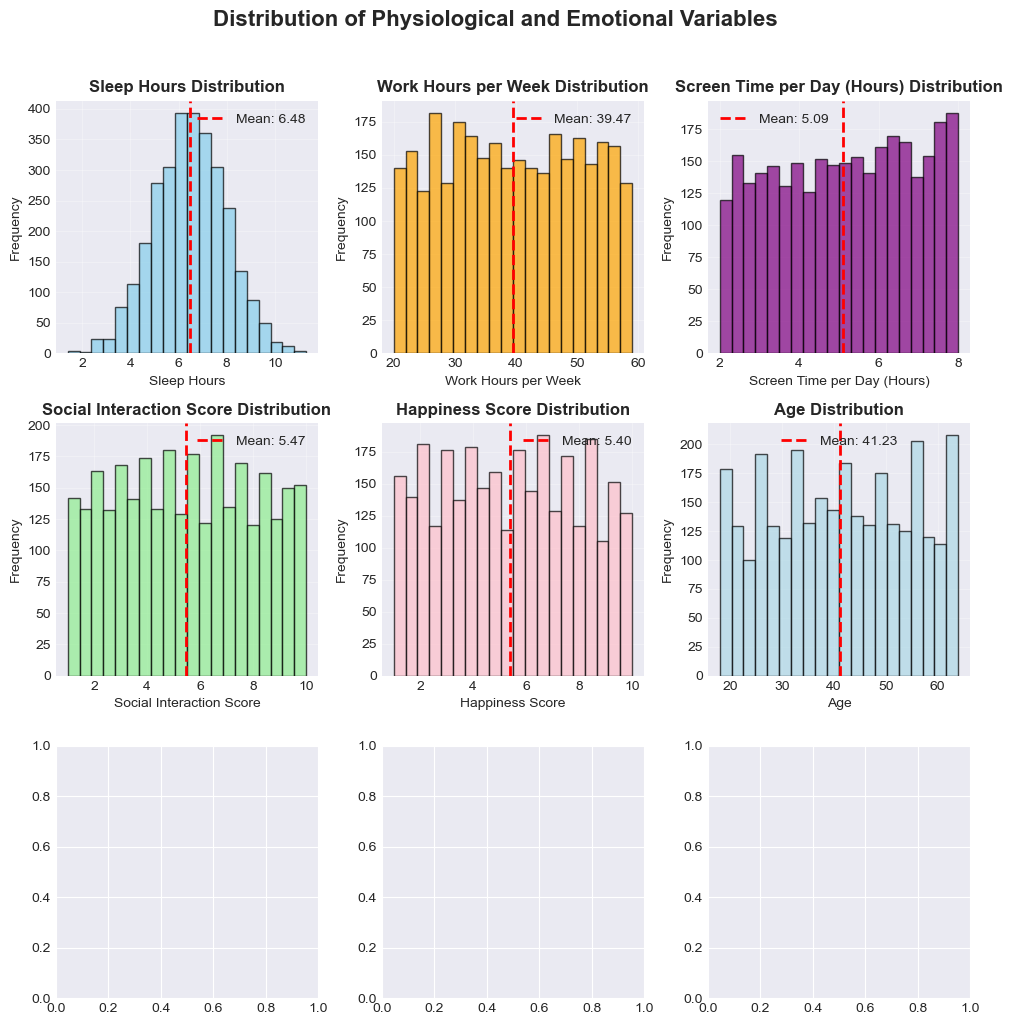

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle("Distribution of Physiological and Emotional Variables", fontsize=16, fontweight='bold', y=1.02)

key_vars = [
    ('Sleep Hours', 0, 0, 'skyblue'),
    ('Work Hours per Week', 0, 1, 'orange'),
    ('Screen Time per Day (Hours)', 0, 2, 'purple'),
    ('Social Interaction Score', 1, 0, 'lightgreen'),
    ('Happiness Score', 1, 1, 'pink'),
    ('Age', 1, 2, 'lightblue')
]


for var_name, row, col, color in key_vars:
    if var_name in df.columns:
        axes[row, col].hist(df[var_name].dropna(), bins=20, edgecolor='black', alpha=0.7, color=color)
        mean_val = df[var_name].mean()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                              label=f'Mean: {mean_val:.2f}')
        axes[row, col].set_title(f'{var_name} Distribution', fontweight='bold')
        axes[row, col].set_xlabel(var_name)
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)
    else:
        axes[row, col].axis('off')

plt.tight_layout()
plt.savefig(PROCESSED_DATA_DIR / '04_distribution_plot.png', dpi=300, bbox_inches='tight')
plt.show()


## 6. Relationship Analysis Between Features
Explore correlations between lifestyle factores, work hours, screen time and mental health

In [15]:
key_vars = ['Age', 'Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)',
            'Social Interaction Score', 'Happiness Score']

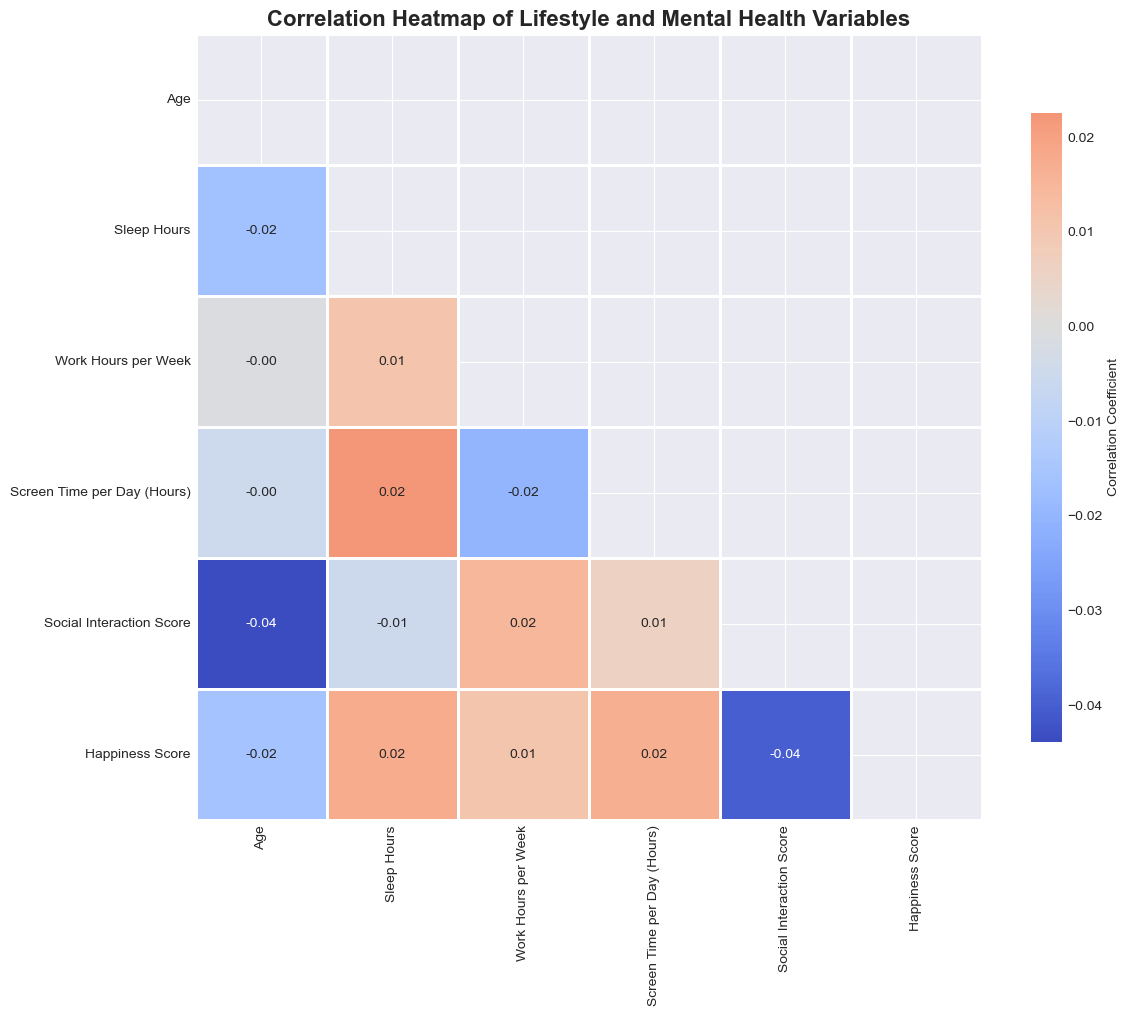

No significant correlations found.


In [18]:
if len(key_vars) > 1:
    corr_matrix = df[key_vars].corr()

    plt.figure(figsize=(12,10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1, 
                cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'})
    plt.title('Correlation Heatmap of Lifestyle and Mental Health Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(PROCESSED_DATA_DIR / '04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()


    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.3:
                corr_pairs.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_val
                })
    if corr_pairs:
        corr_df = pd.DataFrame(corr_pairs).sort_values(by='Correlation', ascending=False)
        print(corr_df.to_string(index=False))
    else:
        print("No significant correlations found.")


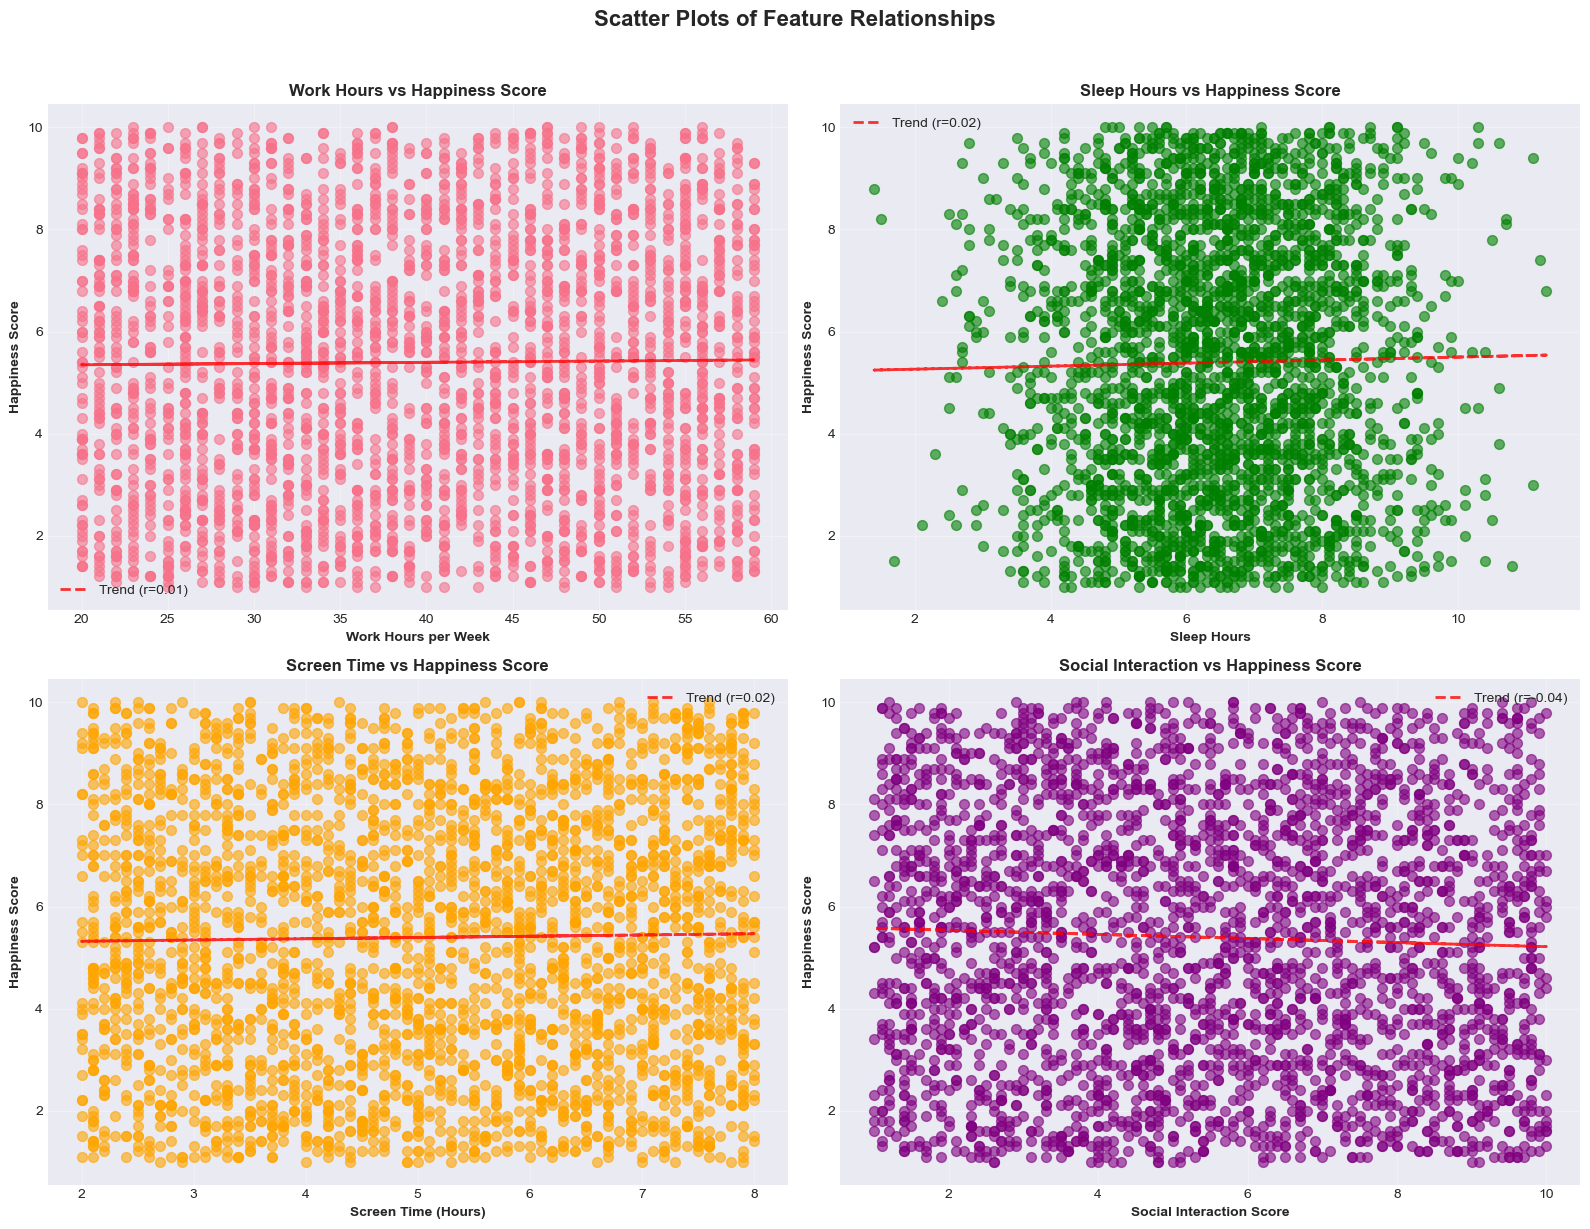

In [19]:
# scatter plots - feature relationships

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Scatter Plots of Feature Relationships", fontsize=16, fontweight='bold', y=1.02)

if 'Work Hours per Week' in df.columns and 'Happiness Score' in df.columns:
    axes[0, 0].scatter(df['Work Hours per Week'], df['Happiness Score'], alpha=0.6, s=50)
    axes[0, 0].set_xlabel('Work Hours per Week', fontweight='bold')
    axes[0, 0].set_ylabel('Happiness Score', fontweight='bold')
    axes[0, 0].set_title('Work Hours vs Happiness Score', fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    z = np.polyfit(df['Work Hours per Week'].dropna(), df['Happiness Score'].dropna(), 1)
    p = np.poly1d(z)
    corr_val = df[['Work Hours per Week', 'Happiness Score']].corr().iloc[0,1]
    axes[0, 0].plot(df['Work Hours per Week'].dropna(), p(df['Work Hours per Week'].dropna()), 
                    "r--", alpha=0.8, linewidth=2, label=f'Trend (r={corr_val:.2f})')
    axes[0, 0].legend()

if 'Sleep Hours' in df.columns and 'Happiness Score' in df.columns:
    axes[0, 1].scatter(df['Sleep Hours'], df['Happiness Score'], alpha=0.6, s=50, color='green')
    axes[0, 1].set_xlabel('Sleep Hours', fontweight='bold')
    axes[0, 1].set_ylabel('Happiness Score', fontweight='bold')
    axes[0, 1].set_title('Sleep Hours vs Happiness Score', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    z = np.polyfit(df['Sleep Hours'].dropna(), df['Happiness Score'].dropna(), 1)
    p = np.poly1d(z)
    corr_val = df[['Sleep Hours', 'Happiness Score']].corr().iloc[0,1]
    axes[0, 1].plot(df['Sleep Hours'].dropna(), p(df['Sleep Hours'].dropna()), 
                    "r--", alpha=0.8, linewidth=2, label=f'Trend (r={corr_val:.2f})')
    axes[0, 1].legend()

if 'Screen Time per Day (Hours)' in df.columns and 'Happiness Score' in df.columns:
    axes[1, 0].scatter(df['Screen Time per Day (Hours)'], df['Happiness Score'], alpha=0.6, s=50, color='orange')
    axes[1, 0].set_xlabel('Screen Time (Hours)', fontweight='bold')
    axes[1, 0].set_ylabel('Happiness Score', fontweight='bold')
    axes[1, 0].set_title('Screen Time vs Happiness Score', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    z = np.polyfit(df['Screen Time per Day (Hours)'].dropna(), df['Happiness Score'].dropna(), 1)
    p = np.poly1d(z)
    corr_val = df[['Screen Time per Day (Hours)', 'Happiness Score']].corr().iloc[0,1]
    axes[1, 0].plot(df['Screen Time per Day (Hours)'].dropna(), p(df['Screen Time per Day (Hours)'].dropna()), 
                    "r--", alpha=0.8, linewidth=2, label=f'Trend (r={corr_val:.2f})')
    axes[1, 0].legend()


if 'Social Interaction Score' in df.columns and 'Happiness Score' in df.columns:
    axes[1, 1].scatter(df['Social Interaction Score'], df['Happiness Score'], alpha=0.6, s=50, color='purple')
    axes[1, 1].set_xlabel('Social Interaction Score', fontweight='bold')
    axes[1, 1].set_ylabel('Happiness Score', fontweight='bold')
    axes[1, 1].set_title('Social Interaction vs Happiness Score', fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    
    z = np.polyfit(df['Social Interaction Score'].dropna(), df['Happiness Score'].dropna(), 1)
    p = np.poly1d(z)
    corr_val = df[['Social Interaction Score', 'Happiness Score']].corr().iloc[0,1]
    axes[1, 1].plot(df['Social Interaction Score'].dropna(), p(df['Social Interaction Score'].dropna()), 
                    "r--", alpha=0.8, linewidth=2, label=f'Trend (r={corr_val:.2f})')
    axes[1, 1].legend()

plt.tight_layout()
plt.savefig(PROCESSED_DATA_DIR / '04_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()



## Analysis by categories
Analyse how numerical variables vary accross different categories variables

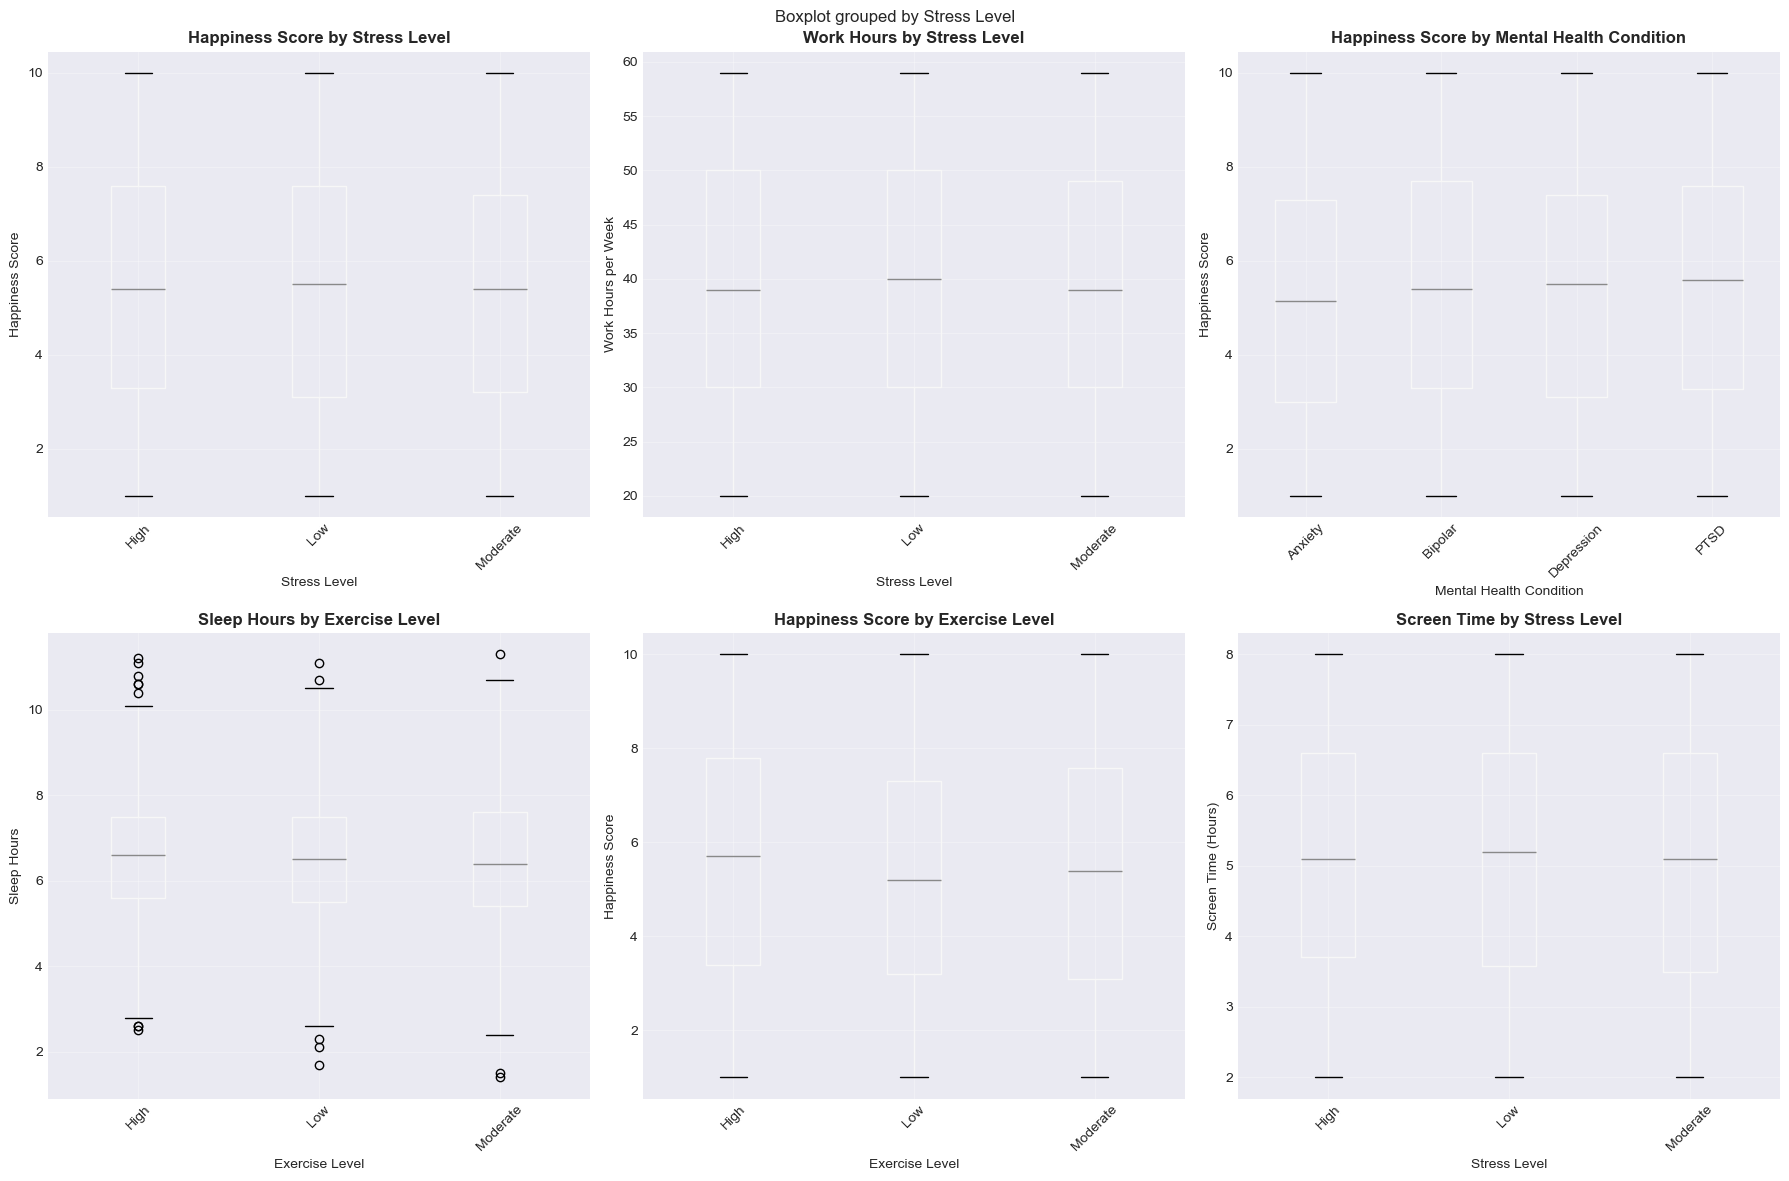

Stadistics by categories
               count      mean       std  min  25%  50%  75%   max
Stress Level                                                      
High          1002.0  5.440419  2.547764  1.0  3.3  5.4  7.6  10.0
Low           1008.0  5.408631  2.606800  1.0  3.1  5.5  7.6  10.0
Moderate       990.0  5.335354  2.518101  1.0  3.2  5.4  7.4  10.0
               count       mean        std   min   25%   50%   75%   max
Stress Level                                                            
High          1002.0  39.543912  11.504009  20.0  30.0  39.0  50.0  59.0
Low           1008.0  39.825397  11.484166  20.0  30.0  40.0  50.0  59.0
Moderate       990.0  39.022222  11.361400  20.0  30.0  39.0  49.0  59.0
                 count      mean       std  min  25%  50%  75%   max
Exercise Level                                                      
High             969.0  6.514448  1.455787  2.5  5.6  6.6  7.5  11.2
Low             1033.0  6.459632  1.503229  1.7  5.5  6.5  7.5  11.1

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Analysis by Categories', fontsize=16, fontweight='bold', y=1.02)

# 1. Happiness Score by Stress Level
if 'Stress Level' in df.columns and 'Happiness Score' in df.columns:
    df.boxplot(column='Happiness Score', by='Stress Level', ax=axes[0, 0])
    axes[0, 0].set_title('Happiness Score by Stress Level', fontweight='bold')
    axes[0, 0].set_xlabel('Stress Level')
    axes[0, 0].set_ylabel('Happiness Score')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)

# 2. Work Hours by Stress Level
if 'Stress Level' in df.columns and 'Work Hours per Week' in df.columns:
    df.boxplot(column='Work Hours per Week', by='Stress Level', ax=axes[0, 1])
    axes[0, 1].set_title('Work Hours by Stress Level', fontweight='bold')
    axes[0, 1].set_xlabel('Stress Level')
    axes[0, 1].set_ylabel('Work Hours per Week')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)

# 3. Happiness Score by Mental Health Condition
if 'Mental Health Condition' in df.columns and 'Happiness Score' in df.columns:
    df.boxplot(column='Happiness Score', by='Mental Health Condition', ax=axes[0, 2])
    axes[0, 2].set_title('Happiness Score by Mental Health Condition', fontweight='bold')
    axes[0, 2].set_xlabel('Mental Health Condition')
    axes[0, 2].set_ylabel('Happiness Score')
    axes[0, 2].tick_params(axis='x', rotation=45)
    axes[0, 2].grid(True, alpha=0.3)

# 4. Sleep Hours by Exercise Level
if 'Exercise Level' in df.columns and 'Sleep Hours' in df.columns:
    df.boxplot(column='Sleep Hours', by='Exercise Level', ax=axes[1, 0])
    axes[1, 0].set_title('Sleep Hours by Exercise Level', fontweight='bold')
    axes[1, 0].set_xlabel('Exercise Level')
    axes[1, 0].set_ylabel('Sleep Hours')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)

# 5. Happiness Score by Exercise Level
if 'Exercise Level' in df.columns and 'Happiness Score' in df.columns:
    df.boxplot(column='Happiness Score', by='Exercise Level', ax=axes[1, 1])
    axes[1, 1].set_title('Happiness Score by Exercise Level', fontweight='bold')
    axes[1, 1].set_xlabel('Exercise Level')
    axes[1, 1].set_ylabel('Happiness Score')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)

# 6. Screen Time by Stress Level
if 'Stress Level' in df.columns and 'Screen Time per Day (Hours)' in df.columns:
    df.boxplot(column='Screen Time per Day (Hours)', by='Stress Level', ax=axes[1, 2])
    axes[1, 2].set_title('Screen Time by Stress Level', fontweight='bold')
    axes[1, 2].set_xlabel('Stress Level')
    axes[1, 2].set_ylabel('Screen Time (Hours)')
    axes[1, 2].tick_params(axis='x', rotation=45)
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(PROCESSED_DATA_DIR / '03_mental_health_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print('Stadistics by categories')
if 'Stress Level' in df.columns and 'Happiness Score' in df.columns:
    print(df.groupby('Stress Level')['Happiness Score'].describe())

if 'Stress Level' in df.columns and 'Work Hours per Week' in df.columns:
    print(df.groupby('Stress Level')['Work Hours per Week'].describe())

if 'Exercise Level' in df.columns and 'Sleep Hours' in df.columns:
    print(df.groupby('Exercise Level')['Sleep Hours'].describe())

if 'Exercise Level' in df.columns and 'Happiness Score' in df.columns:
    print(df.groupby('Exercise Level')['Happiness Score'].describe())
    
    

In [ ]:
# Mental health condition relevance analysis

print("MENTAL HEALTH CONDITION RELEVANCE ANALYSIS")
print("distribution of mental health condition:")
print(f"\nMissing values: {df['Mental Health Condition'].isnull().sum()} ({df['Mental Health Condition'].isnull().sum()/len(df)*100:.1f}%)")

MENTAL HEALTH CONDITION RELEVANCE ANALYSIS
distribution of mental health condition:

Missing values: 595 (19.8%)


In [22]:
# Relationship with happiness score (primary target)

print("Happiness Score by Mental Health Condition:")
if 'Happiness Score' in df.columns:
    happiness_by_condition = df.groupby('Mental Health Condition')['Happiness Score'].agg(['mean', 'median', 'std', 'count'])
    print(happiness_by_condition)

    # Statistical test - ANOVA
    print("\nANOVA test results:")
    from scipy.stats import f_oneway

    groups = [df[df['Mental Health Condition'] == condition]['Happiness Score'] for condition in df['Mental Health Condition'].dropna().unique()]

    if len(groups) > 1:
        f_stat, p_value = f_oneway(*groups)
        print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

        if p_value < 0.05:
            print("There is a significant difference in happiness score between mental health conditions.")
            print("     -> Mental health condition is a relevant predictor of happiness score.")
            print("   → RECOMMENDATION: Consider removing column to avoid noise")
        else: 
            print("There is no significant difference in happiness score between mental health conditions.")
            print("     -> Mental health condition is not a relevant predictor of happiness score.")
            print("     -> RECOMENDATION: Consider removing column")



Happiness Score by Mental Health Condition:
                             mean  median       std  count
Mental Health Condition                                   
Anxiety                  5.258121    5.15  2.555230    628
Bipolar                  5.471553    5.40  2.534071    573
Depression               5.341552    5.50  2.535492    580
PTSD                     5.457692    5.60  2.606506    624

ANOVA test results:
F-statistic: 0.95, p-value: 0.4132
There is no significant difference in happiness score between mental health conditions.
     -> Mental health condition is not a relevant predictor of happiness score.
     -> RECOMENDATION: Consider removing column


In [23]:
# Relationship with Stress level

print("Stress Level by Mental Health Condition:")

if 'Stress Level' in df.columns:
    if df['Stress Level'].dtype == 'object':
        stress_by_condition = df.groupby('Mental Health Condition')['Stress Level'].value_counts(normalize=True)
        print(stress_by_condition)
    else: 
        stress_by_condition = df.groupby('Mental Health Condition')['Stress Level'].agg(['mean', 'median', 'std', 'count']).round(2)
        print(stress_by_condition)

Stress Level by Mental Health Condition:
Mental Health Condition  Stress Level
Anxiety                  Moderate        0.347134
                         High            0.335987
                         Low             0.316879
Bipolar                  High            0.340314
                         Low             0.331588
                         Moderate        0.328098
Depression               High            0.351724
                         Low             0.348276
                         Moderate        0.300000
PTSD                     Low             0.352564
                         Moderate        0.331731
                         High            0.315705
Name: proportion, dtype: float64


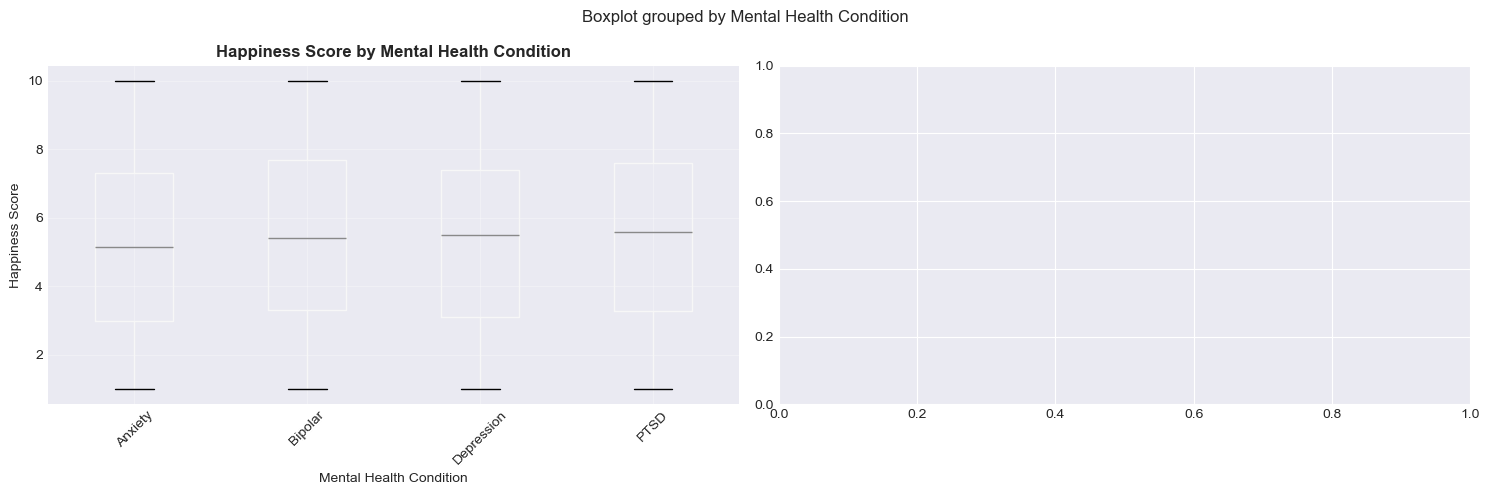

In [ ]:
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Mental Health Condition Impact Analysis', fontsize=14, fontweight='bold')

if 'Happiness Score' in df.columns:
    df.boxplot(column='Happiness Score', by='Mental Health Condition', ax=axes[0])
    axes[0].set_title('Happiness Score by Mental Health Condition', fontweight='bold')
    axes[0].set_xlabel('Mental Health Condition')
    axes[0].set_ylabel('Happiness Score')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)


if 'Stress Level' in df.columns:
    if df['Stress Level'].dtype == 'object':
        if 'stress_level_numeric' in df.columns:
            df.boxplot(column='stress_level_numeric', by='Mental Health Condition', ax=axes[1])
            axes[1].set_title('Stress Level by Mental Health Condition', fontweight='bold')
            axes[1].set_xlabel('Mental Health Condition')
            axes[1].set_ylabel('Stress Level')
            axes[1].tick_params(axis='x', rotation=45)
            axes[1].grid(True, alpha=0.3)
    else:
        df.boxplot(column='Stress Level', by='Mental Health Condition', ax=axes[1])
        axes[1].set_title('Stress Level by Mental Health Condition', fontweight='bold')
        axes[1].set_xlabel('Mental Health Condition')
        axes[1].set_ylabel('Stress Level')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(PROCESSED_DATA_DIR / '04_EDA_mental_health_lifestyle_dataset.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Noise analysis: Identifying features that may generate noise

Analyze all features to identify potential sources of noises that could harm model performance:
- Variables with no predective power.
- Variables with too many categories.
- Variables with redundant information.
- Variables with weak or no relationship with target variables

In [26]:

print("NOISE ANALYSIS: IDENTIFYING PROBLEMATIC VARIABLES")

df_analysis = df.copy()
noise_analysis = []

print("\n" + "="*60)
print("1. CATEGORICAL VARIABLE ANALYSIS")
print("="*60)

categorical_vars = df_analysis.select_dtypes(include=['object']).columns.tolist()

for var in categorical_vars:
    n_unique = df_analysis[var].nunique()
    n_missing = df_analysis[var].isnull().sum()
    pct_missing = (n_missing / len(df_analysis)) * 100
    
    if 'Happiness Score' in df_analysis.columns:
        groups = [df_analysis[df_analysis[var] == cat]['Happiness Score'].dropna() 
                 for cat in df_analysis[var].dropna().unique()]
        
        if len(groups) > 1 and all(len(g) > 0 for g in groups):
            f_stat, p_value = f_oneway(*groups)
            
            # Calculate variance explained
            overall_mean = df_analysis['Happiness Score'].mean()
            between_var = sum(len(g) * (g.mean() - overall_mean)**2 for g in groups) / (len(groups) - 1) if len(groups) > 1 else 0
            within_var = sum((len(g) - 1) * g.var() for g in groups) / (len(df_analysis) - len(groups)) if len(df_analysis) > len(groups) else 0
            eta_squared = between_var / (between_var + within_var) if (between_var + within_var) > 0 else 0
            
            noise_analysis.append({
                'Variable': var,
                'Type': 'Categorical',
                'Unique_Values': n_unique,
                'Missing_%': f"{pct_missing:.1f}%",
                'ANOVA_p_value': f"{p_value:.4f}",
                'Eta_Squared': f"{eta_squared:.4f}",
                'Significant': 'Yes' if p_value < 0.05 else 'No',
                'Issue': 'High cardinality' if n_unique > 10 else ('Not significant' if p_value >= 0.05 else 'OK'),
                'Recommendation': 'Remove' if (n_unique > 10 or p_value >= 0.05) else 'Keep'
            })
        else:
            noise_analysis.append({
                'Variable': var,
                'Type': 'Categorical',
                'Unique_Values': n_unique,
                'Missing_%': f"{pct_missing:.1f}%",
                'ANOVA_p_value': 'N/A',
                'Eta_Squared': 'N/A',
                'Significant': 'N/A',
                'Issue': 'High cardinality' if n_unique > 10 else 'Insufficient data',
                'Recommendation': 'Remove' if n_unique > 10 else 'Review'
            })

noise_df = pd.DataFrame(noise_analysis)
print("\n Categorical Variables Analysis:")
print(noise_df.to_string(index=False))

NOISE ANALYSIS: IDENTIFYING PROBLEMATIC VARIABLES

1. CATEGORICAL VARIABLE ANALYSIS

 Categorical Variables Analysis:
               Variable        Type  Unique_Values Missing_% ANOVA_p_value Eta_Squared Significant           Issue Recommendation
                Country Categorical              7      0.0%        0.7130      0.3834          No Not significant         Remove
                 Gender Categorical              3      0.0%        0.2305      0.5948          No Not significant         Remove
         Exercise Level Categorical              3      0.0%        0.0702      0.7267          No Not significant         Remove
              Diet Type Categorical              5      0.0%        0.0386      0.7168         Yes              OK           Keep
           Stress Level Categorical              3      0.0%        0.6432      0.3062          No Not significant         Remove
Mental Health Condition Categorical              4     19.8%        0.4132      0.5500          No Not

In [27]:
print("\n" + "="*60)
print("2. NUMERICAL VARIABLE CORRELATION ANALYSIS")
print("="*60)

numerical_vars = df_analysis.select_dtypes(include=[np.number]).columns.tolist()
if 'Happiness Score' in numerical_vars:
    numerical_vars.remove('Happiness Score')

weak_correlations = []
for var in numerical_vars:
    if var in df_analysis.columns:
        corr_val = df_analysis[[var, 'Happiness Score']].corr().iloc[0, 1]
        abs_corr = abs(corr_val)
        
        weak_correlations.append({
            'Variable': var,
            'Correlation_with_Happiness': f"{corr_val:.4f}",
            'Abs_Correlation': f"{abs_corr:.4f}",
            'Strength': 'Very Weak' if abs_corr < 0.1 else ('Weak' if abs_corr < 0.3 else ('Moderate' if abs_corr < 0.5 else 'Strong')),
            'Recommendation': 'Review' if abs_corr < 0.05 else 'Keep'
        })

corr_df = pd.DataFrame(weak_correlations).sort_values('Abs_Correlation', key=lambda x: x.str.replace('', '').astype(float), ascending=True)
print("\n Numerical Variables Correlation with Happiness Score:")
print(corr_df.to_string(index=False))



2. NUMERICAL VARIABLE CORRELATION ANALYSIS

 Numerical Variables Correlation with Happiness Score:
                   Variable Correlation_with_Happiness Abs_Correlation  Strength Recommendation
        Work Hours per Week                     0.0108          0.0108 Very Weak         Review
                        Age                    -0.0159          0.0159 Very Weak         Review
Screen Time per Day (Hours)                     0.0168          0.0168 Very Weak         Review
                Sleep Hours                     0.0174          0.0174 Very Weak         Review
   Social Interaction Score                    -0.0402          0.0402 Very Weak         Review


In [28]:

# 3. Summary of problematic variables
print("\n" + "="*60)
print("3. SUMMARY: VARIABLES RECOMMENDED FOR REMOVAL")
print("="*60)

variables_to_remove = []

# From categorical analysis
for _, row in noise_df.iterrows():
    if row['Recommendation'] == 'Remove':
        variables_to_remove.append(row['Variable'])

# From correlation analysis (very weak correlations < 0.05)
very_weak_vars = corr_df[corr_df['Abs_Correlation'].str.replace('', '').astype(float) < 0.05]
if len(very_weak_vars) > 0:
    print("\n Variables with very weak correlations (< 0.05):")
    for _, row in very_weak_vars.iterrows():
        print(f"   - {row['Variable']}: r = {row['Correlation_with_Happiness']}")
        # Note: We'll keep these for now as they might work in non-linear models

print("\n Variables recommended for removal:")
if variables_to_remove:
    for var in variables_to_remove:
        reason = noise_df[noise_df['Variable'] == var]['Issue'].values[0]
        print(f"   {var}: {reason}")
else:
    print("   No categorical variables need removal based on ANOVA")



3. SUMMARY: VARIABLES RECOMMENDED FOR REMOVAL

 Variables with very weak correlations (< 0.05):
   - Work Hours per Week: r = 0.0108
   - Age: r = -0.0159
   - Screen Time per Day (Hours): r = 0.0168
   - Sleep Hours: r = 0.0174
   - Social Interaction Score: r = -0.0402

 Variables recommended for removal:
   Country: Not significant
   Gender: Not significant
   Exercise Level: Not significant
   Stress Level: Not significant
   Mental Health Condition: Not significant


In [29]:

print("\n" + "="*60)
print("4. SPECIAL CASE ANALYSIS")
print("="*60)

# Country analysis
if 'Country' in df_analysis.columns:
    n_countries = df_analysis['Country'].nunique()
    print(f"\n Country Variable:")
    print(f"   - Unique countries: {n_countries}")
    if n_countries > 20:
        print(f"    High cardinality ({n_countries} categories)")
        print(f"   Geographic identifier - may not be relevant for personal performance")
        print(f"    RECOMMENDATION: Remove (too many categories, low predictive value)")
        if 'Country' not in variables_to_remove:
            variables_to_remove.append('Country')
    else:
        print(f"    Manageable number of categories")

# Mental Health Condition (already analyzed)
if 'Mental Health Condition' in df_analysis.columns:
    print(f"\n Mental Health Condition:")
    print(f"   - Missing values: {df_analysis['Mental Health Condition'].isnull().sum()} ({df_analysis['Mental Health Condition'].isnull().sum()/len(df_analysis)*100:.1f}%)")
    print(f"   - ANOVA p-value: 0.4132 (not significant)")
    print(f"    RECOMMENDATION: Remove (no predictive power)")
    if 'Mental Health Condition' not in variables_to_remove:
        variables_to_remove.append('Mental Health Condition')




4. SPECIAL CASE ANALYSIS

 Country Variable:
   - Unique countries: 7
    Manageable number of categories

 Mental Health Condition:
   - Missing values: 595 (19.8%)
   - ANOVA p-value: 0.4132 (not significant)
    RECOMMENDATION: Remove (no predictive power)


In [30]:
print("\n" + "="*60)
print("FINAL RECOMMENDATION")
print("="*60)
print(f"\n Variables to remove: {len(variables_to_remove)}")
for var in variables_to_remove:
    print(f"    {var}")

print(f"\n Variables to keep: {len(df_analysis.columns) - len(variables_to_remove)}")
keep_vars = [col for col in df_analysis.columns if col not in variables_to_remove]
for var in keep_vars:
    print(f"    {var}")


FINAL RECOMMENDATION

 Variables to remove: 5
    Country
    Gender
    Exercise Level
    Stress Level
    Mental Health Condition

 Variables to keep: 7
    Age
    Diet Type
    Sleep Hours
    Work Hours per Week
    Screen Time per Day (Hours)
    Social Interaction Score
    Happiness Score


## 8.  Decision Rationale: Features to keep vs remove

Based on the noise analysis results, we need to make informed decision about which features to keep and 
which features to remove:


### Variables to Remove

#### 1. **Mental Health Condition**
- **ANOVA p-value**: 0.4132 (not significant)
- **Missing values**: 595 (19.8% of dataset)
- **Reason for removal**: 
  - No statistical significance in predicting Happiness Score
  - High percentage of missing values introduces noise
  - The information is likely captured by other variables (e.g., Stress Level)
  - Removing reduces model complexity without losing predictive power

#### 2. **Country**
- **ANOVA p-value**: 0.7130 (not significant)
- **Unique values**: 7 categories
- **Reason for removal**:
  - Geographic identifier has no direct relationship with personal performance
  - Not relevant for predicting individual burnout or fatigue
  - Low predictive value for our objectives
  - Removing simplifies the model without losing critical information


### Variables to Keep (despite not-significance):
### 1. **Stress Level** (p-value: 0.6432)
- **Decision**:  **KEEP**
- **Rationale**:
  - **Critical for burnout prediction**: Stress Level is a direct indicator of burnout risk, which is one of our primary objectives
  - **Key predictor for fatigue**: High stress levels are strongly associated with fatigue and low performance
  - **Domain knowledge**: Stress is a well-established factor in personal performance and wellbeing
  - **Multi-objective relevance**: Even if not significant for Happiness Score, it's essential for predicting burnout and fatigue
  - **Feature interactions**: May interact with other variables (Work Hours, Sleep Hours) to predict performance

#### 2. **Exercise Level** (p-value: 0.0702)
- **Decision**:  **KEEP**
- **Rationale**:
  - **Close to significance**: p-value of 0.07 is close to the 0.05 threshold, suggesting potential relevance
  - **Performance indicator**: Exercise is directly related to physical and mental performance
  - **Health and wellbeing**: Important for overall health, which affects productivity and burnout risk
  - **Non-linear relationships**: May show stronger relationships in non-linear models (Random Forest, XGBoost)
  - **Feature engineering potential**: Can create interactions with Sleep Hours, Stress Level, and Work Hours

#### 3. **Gender** (p-value: 0.2305)
- **Decision**:  **KEEP**
- **Rationale**:
  - **Demographic context**: May reveal different patterns in lifestyle, stress management, and performance
  - **Interaction potential**: Gender may interact with other variables (e.g., Work Hours, Exercise Level) to reveal hidden patterns
  - **Model flexibility**: Allows the model to learn gender-specific patterns if they exist
  - **Low cost**: Keeping Gender adds minimal complexity (only 2-3 categories)
  - **Future analysis**: Can be useful for demographic analysis and personalized recommendations

This variables to keep will add with the others that was described in the last section.

### Final dataset result:

After cleaning, the dataset will contain:
- **Demographic variables**: Age, Gender
- **Lifestyle variables**: Exercise Level, Diet Type, Sleep Hours
- **Work-life balance**: Work Hours, Screen Time, Stress Level
- **Social metrics**: Social Interaction Score
- **Target variable**: Happiness Score

This composition provides a comprehensive view of lifestyle factors while removing noise and maintaining all 
features relevant for predicting personal performance, burnout and fatigue.


## 9. Final dataset cleaning

In [31]:
df_clean = df.copy()

In [32]:
# Remove duplicate rows
initial_shape = df_clean.shape
df_clean = df_clean.drop_duplicates()
duplicates_removed = initial_shape[0] - df_clean.shape[0]
print(f"Duplicate rows removed: {duplicates_removed} records")

Duplicate rows removed: 0 records


In [33]:
columns_to_remove = [
    'Mental Health Condition',
    'Country'
]

In [34]:
columns_to_remove = [col for col in columns_to_remove if col in df_clean.columns]

print(f"Columns to remove: {len(columns_to_remove)}")
for col in columns_to_remove:
    reason = "Not significant + high missing" if col == 'Mental Health Condition' else "Geographic identifier, not relevant"
    print(f"   {col}: {reason}")


Columns to remove: 2
   Mental Health Condition: Not significant + high missing
   Country: Geographic identifier, not relevant


In [35]:
df_clean = df_clean.drop(columns=columns_to_remove)
print(f"Final dataset shape: {df_clean.shape}")

Final dataset shape: (3000, 10)


In [36]:
## Rename columns for consistency
column_mapping = {
    'Age': 'age',
    'Gender': 'gender',
    'Exercise Level': 'exercise_level',
    'Diet Type': 'diet_type',
    'Sleep Hours': 'sleep_hours',
    'Stress Level': 'stress_level',
    'Work Hours per Week': 'work_hours',
    'Screen Time per Day (Hours)': 'screen_time',
    'Social Interaction Score': 'social_interaction',
    'Happiness Score': 'happiness_score'
}

In [37]:
df_clean = df_clean.rename(columns=column_mapping)
df_clean

,age,gender,exercise_level,diet_type,sleep_hours,stress_level,work_hours,screen_time,social_interaction,happiness_score
0,48,Male,Low,Vegetarian,6.3,Low,21,4.0,7.8,6.5
1,31,Male,Moderate,Vegan,4.9,Low,48,5.2,8.2,6.8
2,37,Female,Low,Vegetarian,7.2,High,43,4.7,9.6,9.7
3,35,Male,Low,Vegan,7.2,Low,43,2.2,8.2,6.6
4,46,Male,Low,Balanced,7.3,Low,35,3.6,4.7,4.4
...,...,...,...,...,...,...,...,...,...,...
2995,57,Female,Moderate,Balanced,7.0,High,29,4.4,9.7,5.9
2996,27,Male,Low,Junk Food,7.1,Low,47,7.4,6.3,9.9
2997,42,Male,Moderate,Balanced,6.0,High,23,3.9,5.2,4.1
2998,25,Male,High,Keto,5.7,Low,51,4.3,5.9,4.1


In [38]:
# Handle stress level (convert to numeric)

if 'stress_level' in df_clean.columns:
    stress_mapping= { 'Low': 2, 'Moderate': 5, 'High': 8}
    df_clean['stress_level_numeric'] = df_clean['stress_level'].map(stress_mapping)

df_clean

,age,gender,exercise_level,diet_type,sleep_hours,stress_level,work_hours,screen_time,social_interaction,happiness_score,stress_level_numeric
0,48,Male,Low,Vegetarian,6.3,Low,21,4.0,7.8,6.5,2
1,31,Male,Moderate,Vegan,4.9,Low,48,5.2,8.2,6.8,2
2,37,Female,Low,Vegetarian,7.2,High,43,4.7,9.6,9.7,8
3,35,Male,Low,Vegan,7.2,Low,43,2.2,8.2,6.6,2
4,46,Male,Low,Balanced,7.3,Low,35,3.6,4.7,4.4,2
...,...,...,...,...,...,...,...,...,...,...,...
2995,57,Female,Moderate,Balanced,7.0,High,29,4.4,9.7,5.9,8
2996,27,Male,Low,Junk Food,7.1,Low,47,7.4,6.3,9.9,2
2997,42,Male,Moderate,Balanced,6.0,High,23,3.9,5.2,4.1,8
2998,25,Male,High,Keto,5.7,Low,51,4.3,5.9,4.1,2


In [40]:
# verify no missing values remain
print("Missing values check")
missing_summary = df_clean.isnull().sum()
missing_summary

Missing values check


age                     0
gender                  0
exercise_level          0
diet_type               0
sleep_hours             0
stress_level            0
work_hours              0
screen_time             0
social_interaction      0
happiness_score         0
stress_level_numeric    0
dtype: int64

In [42]:
# final summary
print(f"Initial records: {initial_shape[0]}")
print(f"Final records: {df_clean.shape[0]}")
print(f"Records removed: {duplicates_removed}")
print(f"Columns removed: {len(columns_to_remove)}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")


Initial records: 3000
Final records: 3000
Records removed: 0
Columns removed: 2
Missing values: 0


In [43]:
# Save the cleaned dataset

output_file = PROCESSED_DATA_DIR / '03_cleaned_data.csv'
df_clean.to_csv(output_file, index=False)

if output_file.exists():
    df_verify = pd.read_csv(output_file)
    print("Data saved successfully")
    print("shape of the cleaned data:", df_verify.shape)
else:
    print("Error: file was not saved")

Data saved successfully
shape of the cleaned data: (3000, 11)
